# 회귀분석 (Regression Analysis)

In [5]:
# 필요한 패키지 설치

import pandas as pd # csv file 
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성 
from sklearn.model_selection import train_test_split # train/test set 생성 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가 
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt

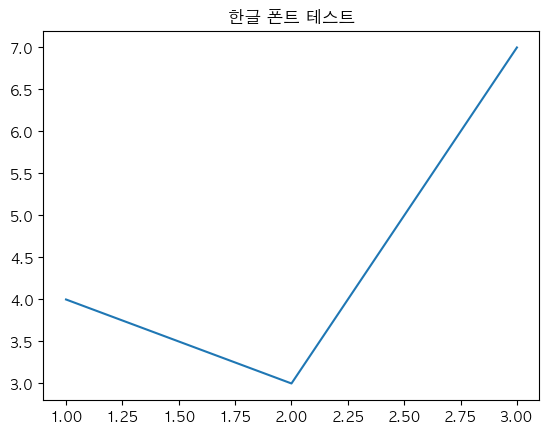

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 운영체제에 따른 폰트 경로 설정
if platform.system() == "Darwin":  # Mac
    font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # Mac 기본 한글 폰트
elif platform.system() == "Windows":  # Windows
    font_path = "C:/Windows/Fonts/malgun.ttf"
else:
    font_path = None

# 폰트 설정
if font_path:
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
else:
    print("지원되지 않는 OS이거나 폰트 파일이 없습니다.")

# 테스트 그래프 출력
plt.plot([1, 2, 3], [4, 3, 7])
plt.title("한글 폰트 테스트")
plt.show()


In [7]:
# import matplotlib as plt
# import matplotlib.font_manager as fm

# # 한글 폰트 지원
# font_path = 'C:/Windows/Fonts/malgun.ttf'

# # 폰트 이름 가져오기
# font_name = fm.FontProperties(fname=font_path).get_name()

# # 폰트 설정
# plt.rc('font', family=font_name)

In [8]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv("/Users/johyeon-u/source/ip/DA_W5_2025/resource/W5/kc_house_data.csv")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
# 각 컬럼의 통계치 확인
df.describe()

# 결측치가 있거나 이상치가 있으면 보정 및 제거를 해주어야 한다. 
# 각 항목별 min과 max 값을 살펴 보자. bedrooms의 max 33은 이상치가 아닌지 확인 필요

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


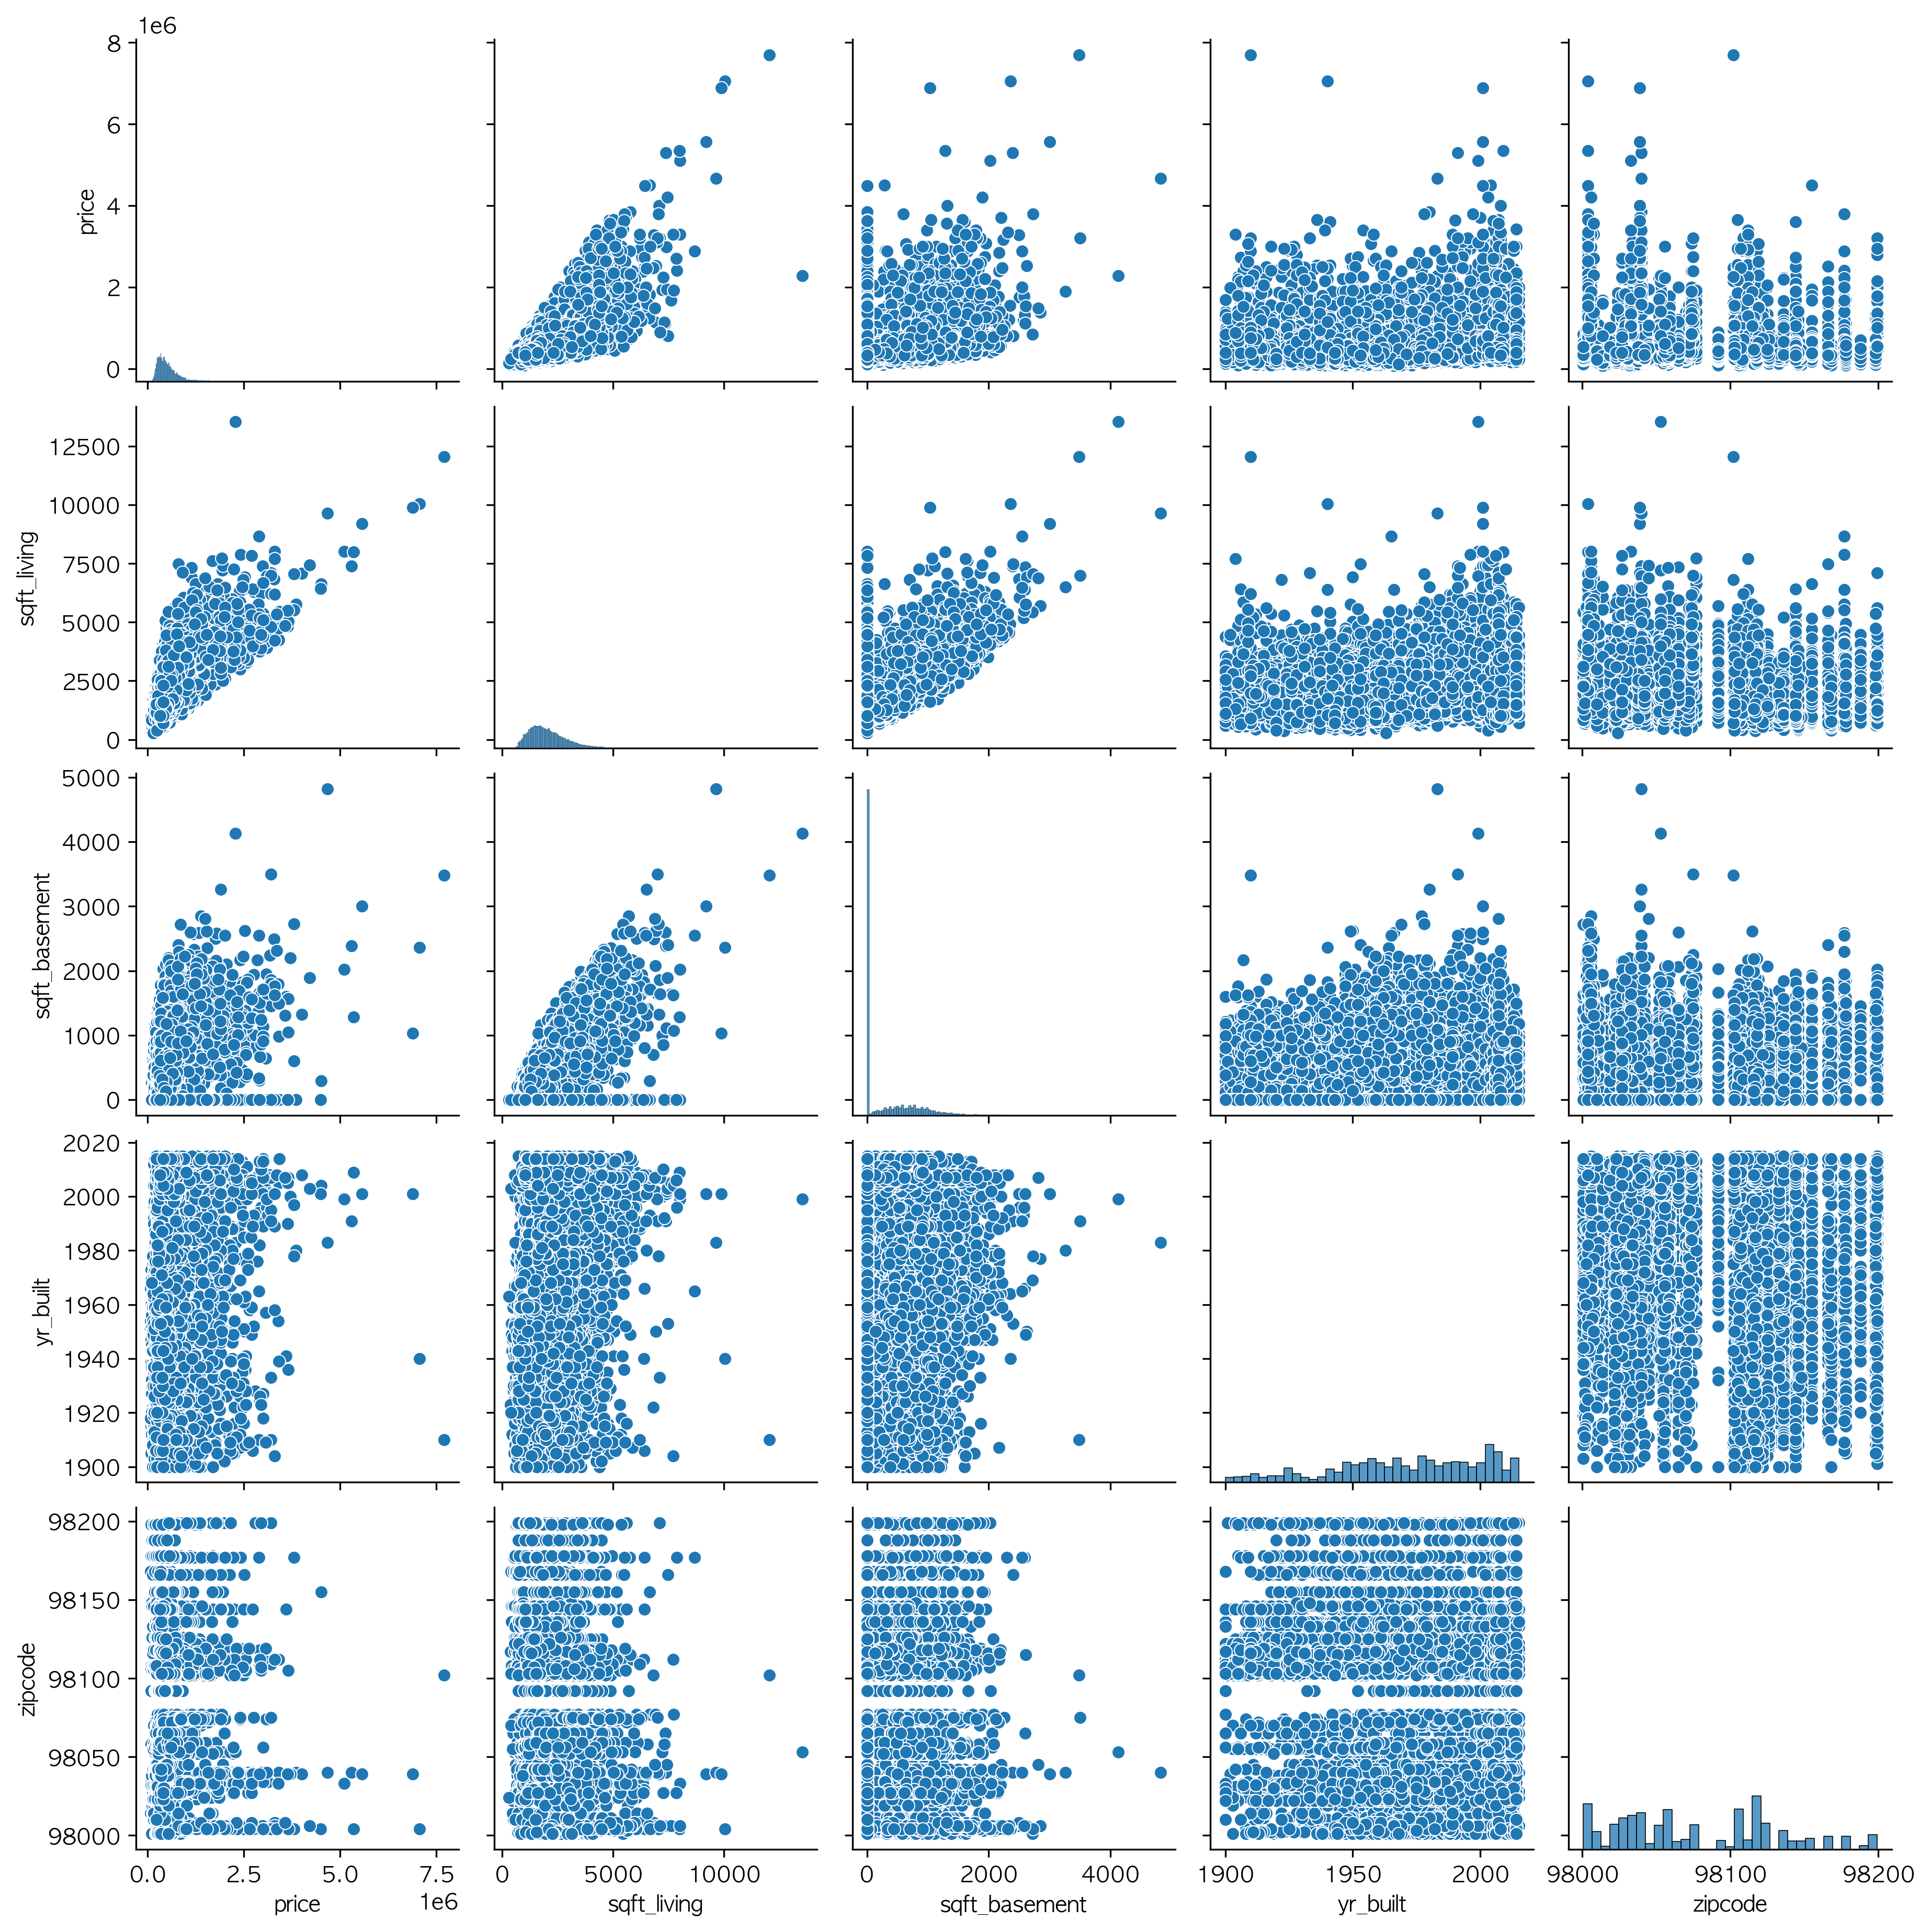

In [11]:
# 데이터 시각화 하여 분포 확인하기

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

sns.pairplot(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()

- price와 soft_living, soft_basement는 상관성이 커 보임. 
- price와 yr_built 도 약간의 상관성이 보임.
- soft_living과 soft_basement는 특히 높은 상관관계가 보여 다중공선성이 있어 보임.

In [12]:
# 변수 선택 및 컬럼명 붙여넣기 위한 컬럼 리스트 생성
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1. 다중 선형회귀모델 예측

In [13]:
# 독립변수와 종속변수 분리하여 생성
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['price']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
# df_train, df_test = train_test_split(df, test_size = 0.3) 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [14]:
# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  15129
test data 개수:  6484


##### - 다중회귀모델 생성 및 학습

In [15]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train) 
# 앞서 설치했던 sklearn의 LinearRegression을 학습데이터에 적용 해준다. 학습 데이터를 통해 price를 예측할 수 있는 회귀계수가 생성된다. 
# fit_intercept 인수는 모형에 상수항을 넣을지 말지를 설정해 주는 명령어다. 기본 값은 True라서 상수항을 빼지 않을 거라면, 생략해도 된다.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


LinearRegression()

In [16]:
print(x_train.shape)
print(x_test.shape)

(15129, 18)
(6484, 18)


In [17]:
# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

#### - 다중 선형회귀 모델 예측 결과검토

In [18]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.70
테스트셋 R-Square: 0.70


- 학습셋 0.7 정도면 준수한 수준
- 학습셋과 테스트셋의 결과의 차이가 별로 없다는 것 -> 과적합되지 않았다는 것 확인

In [19]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f'MSE = {mse:.3f}, RMSE = {rmse:.3f}')

MSE = 38498387770.954, RMSE = 196210.060


In [ ]:
np.set_printoptions(suppress=True)

# 모델의 상수값 확인
print(f'y 절편값 = {mreg.intercept_}')
 
# 모델의 회귀계수 확인
# print('회귀계수값 = ', np.round(mreg.coef_ , 2))
print(f'회귀계수값 = {np.round(mreg.coef_ , 1)}') 
print(mreg.coef_.shape)

# 그런데 LinearRegression 패키지는 R스퀘어 등 자세한 모델 결과치 확인이 어렵다. 수식을 코딩해주면 가능하지만, 여간 번거로운 일이 아니다. 
# 그래서 자세한 모델 결과값을 확인하고 싶을 때는 OLS(Ordinary Least Squares) 패키지를 사용하면 편리하다.

y 절편값 = [8208311.45664346]
회귀계수값 = [[ -39683.5   37167.4     114.3       0.1    7216.8  612340.4   50918.6
    25459.8   96148.4      70.       44.3   -2653.5      20.9    -590.5
   595726.6 -212173.1      23.9      -0.3]]
(1, 18)


In [21]:
coef = pd.Series(data=np.round(mreg.coef_[0], 2), index=x.columns)
coef.sort_values(ascending = False)

waterfront       612340.40
lat              595726.56
grade             96148.37
view              50918.59
bathrooms         37167.44
condition         25459.81
floors             7216.76
sqft_living         114.31
sqft_above           70.03
sqft_basement        44.29
sqft_living15        23.95
yr_renovated         20.95
sqft_lot              0.09
sqft_lot15           -0.33
zipcode            -590.53
yr_built          -2653.49
bedrooms         -39683.46
long            -212173.07
dtype: float64

#### - 자세한 모델 결과치 확인: statsmodel 패키지의 ols 사용

##### 

- 상수항 결합 : sm.add_const() 사용하는 이유

    - statsmodels 패키지 사용시 수동으로 상수항 결합해줘야 함.
    - scikitlearn 패키지 사용시는 자동으로 상수항 결합됨.

In [22]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6083,3,2.25,1880,7350,1.0,0,0,3,8,1390,490,1984,0,98058,47.4457,-122.123,1910,8400
14366,1,1.00,850,8050,1.0,0,0,2,6,850,0,1906,0,98118,47.5427,-122.288,1590,5180
20862,3,2.50,1690,1200,2.0,0,0,3,8,1410,280,2014,0,98106,47.5388,-122.367,1740,1664
14022,3,2.00,1660,8281,1.0,0,0,3,7,1660,0,1949,0,98136,47.5568,-122.382,1660,7559
5581,4,3.00,2450,4668,2.0,0,0,3,8,2450,0,2004,0,98028,47.7721,-122.235,2460,4895


In [23]:
xx = sm.add_constant(x_train)
xx.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6083,1.0,3,2.25,1880,7350,1.0,0,0,3,8,1390,490,1984,0,98058,47.4457,-122.123,1910,8400
14366,1.0,1,1.00,850,8050,1.0,0,0,2,6,850,0,1906,0,98118,47.5427,-122.288,1590,5180
20862,1.0,3,2.50,1690,1200,2.0,0,0,3,8,1410,280,2014,0,98106,47.5388,-122.367,1740,1664
14022,1.0,3,2.00,1660,8281,1.0,0,0,3,7,1660,0,1949,0,98136,47.5568,-122.382,1660,7559
5581,1.0,4,3.00,2450,4668,2.0,0,0,3,8,2450,0,2004,0,98028,47.7721,-122.235,2460,4895


In [24]:
xx.describe()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15129.0,15129.000000,15129.000000,15129.000000,1.512900e+04,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000
mean,1.0,3.369092,2.119687,2085.203186,1.536142e+04,1.498215,0.007932,0.233723,3.403596,7.667394,1795.491110,289.712076,1971.277811,85.101064,98077.771961,47.559981,-122.212791,1993.724767,13033.574195
std,0.0,0.901809,0.770738,920.451234,4.298300e+04,0.540528,0.088710,0.766738,0.649393,1.175344,833.391893,440.197965,29.376094,403.299031,53.641859,0.138237,0.141472,687.728357,28682.902361
min,1.0,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000
25%,1.0,3.000000,1.750000,1430.000000,5.030000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.327000,1490.000000,5100.000000
50%,1.0,3.000000,2.250000,1920.000000,7.601000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571400,-122.229000,1850.000000,7620.000000
75%,1.0,4.000000,2.500000,2560.000000,1.072600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677400,-122.123000,2370.000000,10125.000000
max,1.0,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### - 상수항 추가된 값을 이용한 ols 함수 호출

In [25]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2062.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:27:36   Log-Likelihood:            -2.0638e+05
No. Observations:               15129   AIC:                         4.128e+05
Df Residuals:                   15111   BIC:                         4.129e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.208e+06   3.54e+06      2.316      0.021    1.26e+06    1.52e+07
bedrooms      -3.968e+04   2394.565    -16.572      0.000   -4.44e+04    -3.5e+04
bathrooms      3.717e+04   3946.818      9.417      0.000    2.94e+04    4.49e+04
sqft_living     114.3145      2.753     41.529      0.000     108.919     119.710
sqft_lot          0.0877      0.056      1.573      0.116      -0.022       0.197
floors         7216.7628   4341.630      1.662      0.096   -1293.357    1.57e+04
waterfront     6.123e+05   2.06e+04     29.766      0.000    5.72e+05    6.53e+05
view           5.092e+04   2598.199     19.598      0.000    4.58e+04     5.6e+04
condition      2.546e+04   2844.228      8.951      0.000    1.99e+04     3.1e+04
grade          9.615e+04   2605.263     36.905      0.000     9.1e+04    1.01e+05
sqft_above       70.0245      2.711     25.829      0.000      64.710      75.338
sqft_basement    44.2877      3.206     13.816      0.000      38.005      50.571
yr_built      -2653.4860     88.271    -30.061      0.000   -2826.508   -2480.464
yr_renovated     20.9452      4.398      4.762      0.000      12.324      29.567
zipcode        -590.5323     39.827    -14.827      0.000    -668.599    -512.466
lat            5.957e+05    1.3e+04     45.804      0.000     5.7e+05    6.21e+05
long          -2.122e+05   1.58e+04    -13.412      0.000   -2.43e+05   -1.81e+05
sqft_living15    23.9489      4.158      5.760      0.000      15.800      32.098
sqft_lot15       -0.3256      0.084     -3.857      0.000      -0.491      -0.160
==============================================================================
Omnibus:                    13610.446   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1710588.367
Skew:                           3.842   Prob(JB):                         0.00
Kurtosis:                      54.523   Cond. No.                     6.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.92e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- 다중공선성 문제가 있음을 알려줌 -> 상관관계가 높은 변수 제거 혹은 가공 절차 필요성 보여줌

## 2. 다항 회귀모델 예측

In [26]:
# 다항회귀 불러오기
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 변환
poly_m = PolynomialFeatures(degree=2, include_bias=False) # degree=2 독립변수를 2차항으로 변환하겠다는 의미
                                                          # include_bias 기본값=True, 편향을 위한 변수 X0 추가. 다항식의 모든 거듭제곱이 0이면 True로 추가
# 다항 변수 변환 동작 확인을 위한 테스트 코드 (2차항)
x_demo = [[1, 2, 3],[10, 20, 30], [100, 200, 300]] #[[x1, y1, z1], [x2, y2, z2], [x3, y3, z3]]
x_demo_poly = poly_m.fit_transform(x_demo)         #[[x1, y1, z1, x1x1, x1y1, x1z1, y1y1, y1z1, z1z1], [x2, y2, z2, x2x2, x2y2, x2z2, y2y2, y2z2, z2z2], [x3, y3, z3, x3x3, x3y3, x3z3, y3y3, y3z3, z3z3]]
print(x_demo)
print(x_demo_poly)

# x_train 데이터에 대한 다항 변수 변환
x_train_poly = poly_m.fit_transform(x_train)

# 다항 회귀모델 생성
mreg_poly = LinearRegression(fit_intercept=True)

# 다항회귀 학습
mreg_poly.fit(x_train_poly, y_train) 

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]
[[    1.     2.     3.     1.     2.     3.     4.     6.     9.]
 [   10.    20.    30.   100.   200.   300.   400.   600.   900.]
 [  100.   200.   300. 10000. 20000. 30000. 40000. 60000. 90000.]]


In [27]:
# 모델의 상수값 확인
print(mreg_poly.intercept_)

# 모델의 회귀계수 확인
print(mreg_poly.coef_)
print(mreg_poly.coef_.shape)

[-26345731.03141709]
[[   -11.27778356      2.99518717  -3212.87807073   -410.85985788
       3.44999513      1.11660766     12.74353389    -10.42974344
       9.57018372  10454.64865385 -13667.5037565    -505.19152728
   44619.49876363    -73.33169295      0.18765648      0.36687384
   21594.59358834   1391.22079684   3087.19655946  -3376.35813958
     -19.66192862      0.19337562  15842.51760011    226.85849264
    3159.39060948  -1025.23299226   -380.89691932     -6.51236902
     -13.14958202   -102.99176919     -9.45001246      3.03256241
   -1200.37415101    389.26317278     15.37103788     -0.11140234
   -5900.31746552     16.40795797     -0.46083783 -22023.35279121
    -200.89634672   4034.37737764 -13447.94846096  16886.44221375
      15.06658741      1.34137199    213.61257142    -14.20906433
      -3.95852079   -361.71842102    321.02608052    -13.89766484
       0.31511647      0.00052105      0.00003546     -1.81031472
     129.94443162    -14.08471474     16.04693305     2

#### - 다항 회귀모델 예측 결과 검토

In [28]:
print("학습셋 R-Square: {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))

학습셋 R-Square: 0.81
테스트셋 R-Square: 0.79


- 학습셋에 대한 R2 값이 0.83 으로 매우 좋은 수준
- 학습셋에 대한 R2와 테스트셋에 대한 R2 값이 큰 차이 없음 -> 과적합 문제 없음
- 독립변수와 종속변수는 비선형적인 관계

In [29]:
mse = mean_squared_error(y_test, y_predict_poly)
rmse = np.sqrt(mse)

print(f'MSE = {mse:.3f}, RMSE = {rmse:.3f}')

MSE = 26515069452.796, RMSE = 162834.485
